In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro, levene

path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0502.csv'
case0502 = pd.read_csv(path)
case0502.head()

,Percent,Judge
0,6.4,Spock's
1,8.7,Spock's
2,13.3,Spock's
3,13.6,Spock's
4,15.0,Spock's


In [56]:
case0502.shape

(46, 2)

In [16]:
case0502.tail()

,Percent,Judge
41,26.7,F
42,29.5,F
43,29.8,F
44,31.9,F
45,36.2,F


<Figure size 800x600 with 0 Axes>

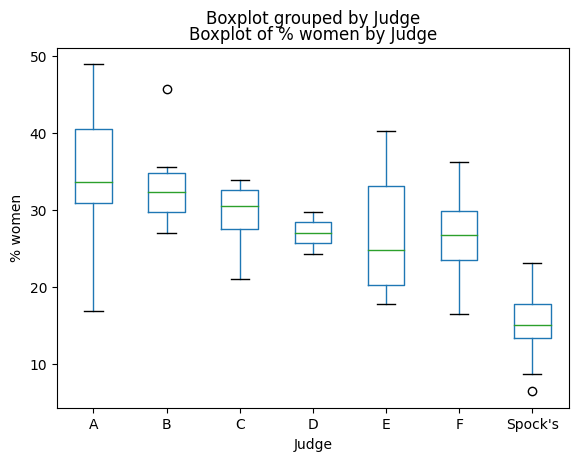

In [20]:
# Create boxplot
plt.figure(figsize=(8, 6))
case0502.boxplot(column='Percent', by='Judge', grid=False)
plt.ylabel("% women")
plt.title("Boxplot of % women by Judge")
plt.show()

In [34]:
model = ols('Percent ~ Judge', data=case0502).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Percent   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     6.718
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           6.10e-05
Time:                        06:08:44   Log-Likelihood:                -150.42
No. Observations:                  46   AIC:                             314.8
Df Residuals:                      39   BIC:                             327.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.1200      3.092  

In [35]:
# Shapiro-Wilk test
residuals = model.resid
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk test:", shapiro_test)

Shapiro-Wilk test: ShapiroResult(statistic=0.9881719350814819, pvalue=0.9167299270629883)


The * operator is used to unpack this list and pass its elements (individual arrays/lists) as separate arguments to the levene function.

In [36]:
# Levene's test
group_data = [case0502[case0502['Judge'] == group]['Percent'] for group in case0502['Judge'].unique()]
levene_test = levene(*group_data)
print("Levene's test:", levene_test)

Levene's test: LeveneResult(statistic=1.2624739826679283, pvalue=0.2969091069516256)


In [37]:
# ANOVA table
anova_table = anova_lm(model)
print("ANOVA table:")
print(anova_table)

ANOVA table:
            df       sum_sq     mean_sq         F    PR(>F)
Judge      6.0  1927.080865  321.180144  6.718366  0.000061
Residual  39.0  1864.445222   47.806288       NaN       NaN


In [57]:
# Obtain fitted values and residuals
fitted_values = model.fittedvalues
fitted_values

0     14.622222
1     14.622222
2     14.622222
3     14.622222
4     14.622222
5     14.622222
6     14.622222
7     14.622222
8     14.622222
9     34.120000
10    34.120000
11    34.120000
12    34.120000
13    34.120000
14    33.616667
15    33.616667
16    33.616667
17    33.616667
18    33.616667
19    33.616667
20    29.100000
21    29.100000
22    29.100000
23    29.100000
24    29.100000
25    29.100000
26    29.100000
27    29.100000
28    29.100000
29    27.000000
30    27.000000
31    26.966667
32    26.966667
33    26.966667
34    26.966667
35    26.966667
36    26.966667
37    26.800000
38    26.800000
39    26.800000
40    26.800000
41    26.800000
42    26.800000
43    26.800000
44    26.800000
45    26.800000
dtype: float64

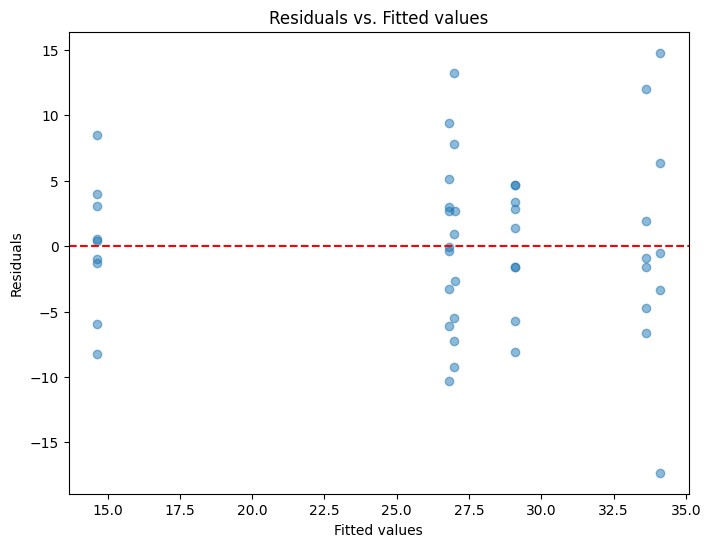

In [38]:
# Obtain fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Create residual vs. fitted plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.show()

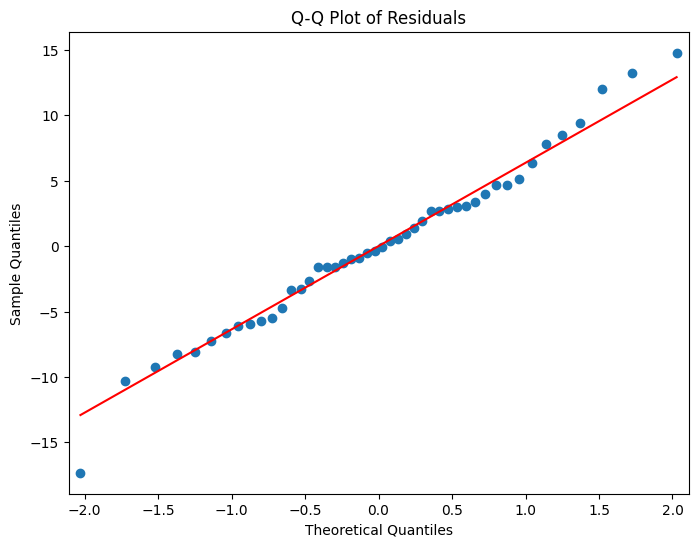

In [39]:
# Create QQ plot of residuals
plt.figure(figsize=(8, 6))
sm.graphics.qqplot(residuals, line='s', ax=plt.gca())  # 's' line for standardized line
plt.title('Q-Q Plot of Residuals')
plt.show()

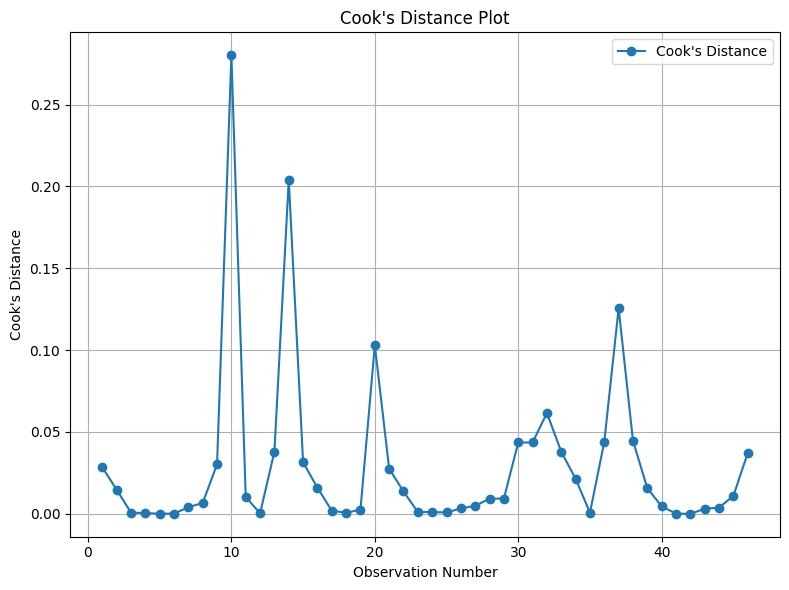

In [45]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Get Cook's distance
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance[0]

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Cook's distances vs observation number
ax1.plot(range(1, len(case0502['Percent']) + 1), cook_distance, 'o-', label='Cook\'s Distance')
ax1.set_xlabel('Observation Number')
ax1.set_ylabel('Cook\'s Distance')

# Customize the plot as needed
ax1.grid(True)
ax1.set_title('Cook\'s Distance Plot')
plt.legend()

plt.tight_layout()
plt.show()


There are concerning outliers (high influence points)

In [46]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis H-test
kruskal_test_result = kruskal(*[case0502[case0502['Judge'] == group]['Percent'] for group in case0502['Judge'].unique()])

# Print the test result
print("Kruskal-Wallis H-test result:")
print(kruskal_test_result)

Kruskal-Wallis H-test result:
KruskalResult(statistic=21.964669051878353, pvalue=0.0012288530440194424)


Mice study

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro, levene

path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0501.csv'
case0501 = pd.read_csv(path)
case0501.head()

,Lifetime,Diet
0,35.5,NP
1,35.4,NP
2,34.9,NP
3,34.8,NP
4,33.8,NP


<Figure size 800x600 with 0 Axes>

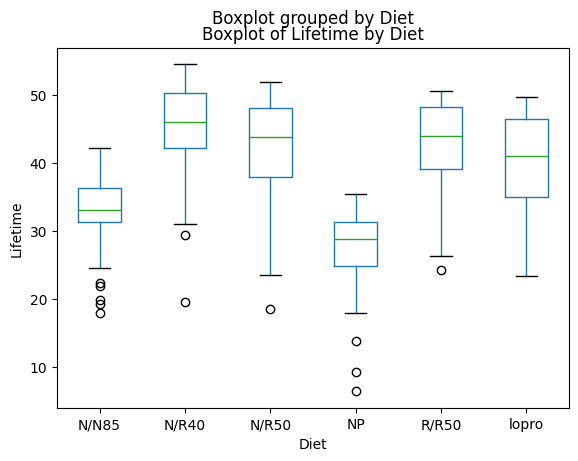

In [48]:
# Create boxplot
plt.figure(figsize=(8, 6))
case0501.boxplot(column='Lifetime', by='Diet', grid=False)
plt.ylabel("Lifetime")
plt.title("Boxplot of Lifetime by Diet")
plt.show()

In [49]:
model2 = ols('Lifetime ~ Diet', data=case0501).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Lifetime   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     57.10
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           4.11e-43
Time:                        06:35:59   Log-Likelihood:                -1154.9
No. Observations:                 349   AIC:                             2322.
Df Residuals:                     343   BIC:                             2345.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        32.6912      0.885     36.958

In [50]:
# Shapiro-Wilk test
residuals = model2.resid
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk test:", shapiro_test)

Shapiro-Wilk test: ShapiroResult(statistic=0.9318796992301941, pvalue=1.540717206593989e-11)


In [51]:
# Levene's test
group_data = [case0501[case0501['Diet'] == group]['Lifetime'] for group in case0501['Diet'].unique()]
levene_test = levene(*group_data)
print("Levene's test:", levene_test)

Levene's test: LeveneResult(statistic=2.7212488273932744, pvalue=0.01989421352003496)


In [52]:
# ANOVA table
anova_table = anova_lm(model2)
print("ANOVA table:")
print(anova_table)

ANOVA table:
             df        sum_sq      mean_sq          F        PR(>F)
Diet        5.0  12733.941812  2546.788362  57.104314  4.111744e-43
Residual  343.0  15297.415323    44.598878        NaN           NaN


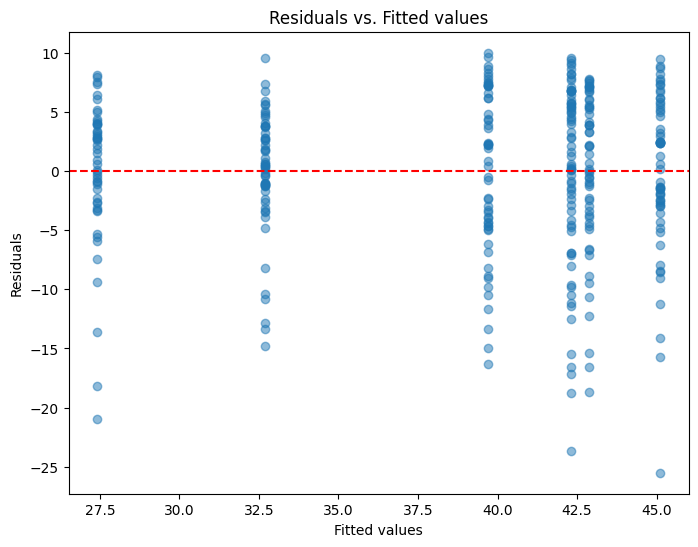

In [53]:
# Obtain fitted values and residuals
fitted_values = model2.fittedvalues
residuals = model2.resid

# Create residual vs. fitted plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.show()

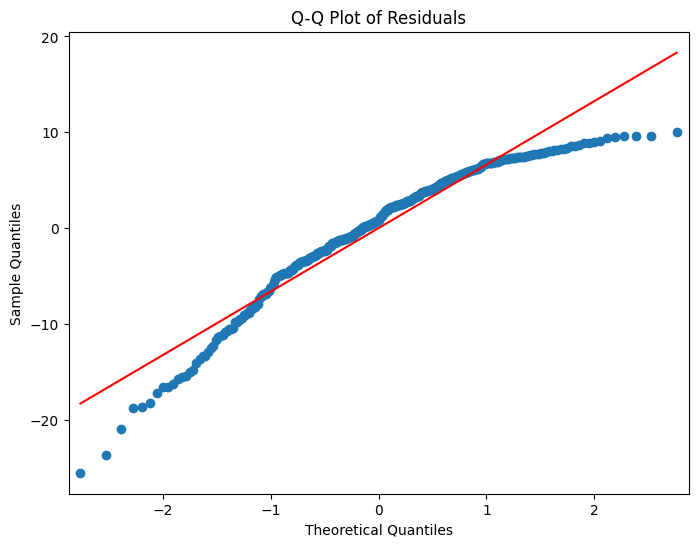

In [54]:
# Create QQ plot of residuals
plt.figure(figsize=(8, 6))
sm.graphics.qqplot(residuals, line='s', ax=plt.gca())  # 's' line for standardized line
plt.title('Q-Q Plot of Residuals')
plt.show()

In [55]:
from scipy.stats import kruskal
# Perform Kruskal-Wallis H-test
kruskal_test_result = kruskal(*group_data)

# Print the test result
print("Kruskal-Wallis H-test result:")
print(kruskal_test_result)

Kruskal-Wallis H-test result:
KruskalResult(statistic=159.01277965801276, pvalue=1.6067487639499727e-32)
